L2 error of intuitive approximation: 0.017918079743199856
A: Matrix([[1, 2/pi], [2/pi, 1/2]])
b: Matrix([[4/3], [8/pi**3 + 2/pi]])
c: [4*(-6*pi**2 - 24 + pi**4)/(3*pi**2*(-8 + pi**2)), 4*(12 - pi**2)/(3*pi*(-8 + pi**2))] [1.02545472032154, 0.483614594417637]
u: 4*(12 - pi**2)*sin(pi*x)/(3*pi*(-8 + pi**2)) + 4*(-6*pi**2 - 24 + pi**4)/(3*pi**2*(-8 + pi**2))
\frac{4 \left(12 - \pi^{2}\right) \sin{\left(\pi x \right)}}{3 \pi \left(-8 + \pi^{2}\right)} + \frac{4 \left(- 6 \pi^{2} - 24 + \pi^{4}\right)}{3 \pi^{2} \left(-8 + \pi^{2}\right)}
\left[\begin{matrix}1 & \frac{2}{\pi}\\\frac{2}{\pi} & \frac{1}{2}\end{matrix}\right]
\left[ \frac{4 \left(- 6 \pi^{2} - 24 + \pi^{4}\right)}{3 \pi^{2} \left(-8 + \pi^{2}\right)}, \  \frac{4 \left(12 - \pi^{2}\right)}{3 \pi \left(-8 + \pi^{2}\right)}\right]
\left[\begin{matrix}\frac{4}{3}\\\frac{8}{\pi^{3}} + \frac{2}{\pi}\end{matrix}\right]
L2 error of least squares approximation: 0.008764219540779286


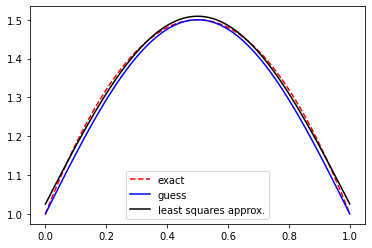

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xc = np.linspace(0, 1, 101)  # x coordinates for plotting

def f(x):
    return 1 + 2*x*(1-x)

import sympy as sym
x = sym.symbols('x')
psi_0 = 1
psi_1 = sym.sin(sym.pi*x)

half = sym.Rational(1,2)
u = 1*psi_0 + half*psi_1

# How to combine c_0*psi_0 + c_1*psi_1 to match f?
# Intuitively, c_0=c_1=1...
# Turn u to function so we can plot and compute with it
u = sym.lambdify([x], u, modules='numpy')

print('L2 error of intuitive approximation:', end=' ')
e = f(xc) - u(xc)
dx = xc[1] - xc[0]
print(np.sqrt(dx*np.sum(e**2)))

plt.plot(xc, f(xc), 'r--')
plt.plot(xc, u(xc), 'b-')
plt.legend(['exact', 'intuitive approximation'])
plt.savefig('tmp1.png'); plt.savefig('tmp1.pdf')

# Do the calculations in the least squares or project method
A = sym.zeros(2, 2)
b = sym.zeros(2, 1)
A[0,0] = sym.integrate(psi_0*psi_0, (x, 0, 1))
A[0,1] = sym.integrate(psi_0*psi_1, (x, 0, 1))
A[1,0] = A[0,1]
A[1,1] = sym.integrate(psi_1*psi_1, (x, 0, 1))
b[0] = sym.integrate(f(x)*psi_0, (x, 0, 1))
b[1] = sym.integrate(f(x)*psi_1, (x, 0, 1))
print('A:', A)
print('b:', b)
c = A.LUsolve(b)
c = [sym.simplify(c[i,0]) for i in range(c.shape[0])]
print('c:', c, [c_.evalf() for c_ in c])
u = c[0]*psi_0 + c[1]*psi_1
print('u:', u)
print(sym.latex(u))
print(sym.latex(A))
print(sym.latex(c))
print(sym.latex(b))
# Turn u to function so we can plot it
u = sym.lambdify([x], u, modules='numpy')

print('L2 error of least squares approximation:', end=' ')
e = f(xc) - u(xc)
dx = xc[1] - xc[0]
print(np.sqrt(dx*np.sum(e**2)))

plt.plot(xc, u(xc), 'k-')
plt.legend(['exact', 'guess', 'least squares approx.'],
           loc='lower center')
plt.savefig('tmp2.png'); plt.savefig('tmp2.pdf')
plt.show()



